In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
sns.set(rc={'figure.figsize':(8,6)})

### Prepare some data

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

<AxesSubplot:xlabel='X', ylabel='Y'>

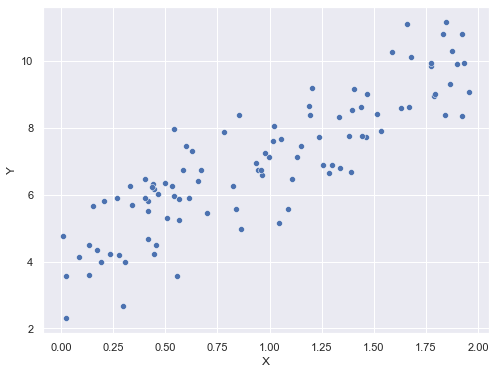

In [4]:
data = pd.DataFrame({"X": X.T[0], "Y": y.T[0]})
sns.scatterplot(data=data, x="X", y="Y")

### Normal Equation

$\beta = (X^{T}X)^{-1}X^{T}y$

In [5]:
X_b = np.c_[np.ones((100, 1)), X]

In [6]:
beta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
beta_best

array([[4.10250382],
       [2.98843616]])

In [7]:
X_pred = np.array([[0], [2]])
X_pred = np.c_[np.ones((2, 1)), X_pred]
y_pred = X_pred.dot(beta_best)
y_pred

array([[ 4.10250382],
       [10.07937615]])

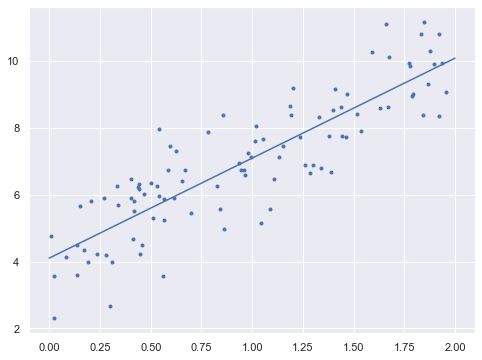

In [48]:
plt.plot(X_pred, y_pred)
plt.plot(X, y, "b. ")

### sklearn implementation of Linear regression

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.10250382]), array([[2.98843616]]))

In [10]:
X_pred

array([[1., 0.],
       [1., 2.]])

In [11]:
X_pred = np.array([[0], [2]])
lin_reg.predict(X_pred)

array([[ 4.10250382],
       [10.07937615]])

### numpy implementation of Least Squares
This is using the Moore-Penrose pseudoinverse

In [12]:
np.linalg.lstsq(X_b, y, rcond=1e-6)[0]

array([[4.10250382],
       [2.98843616]])

In [13]:
np.linalg.pinv(X_b).dot(y)

array([[4.10250382],
       [2.98843616]])

### Gradient descent - matrix form

In [21]:
alpha = 0.1
iterations = 1000
n = 100
beta = np.random.randn(2, 1)
for _ in range(iterations):
    gradient = 2/n*X_b.T.dot(X_b.dot(beta) - y)
    beta = beta - alpha * gradient
beta

array([[4.10250382],
       [2.98843616]])

### Stochastic gradient descent

In [42]:
epochs = 100
n = 100
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t + t1)

beta = np.random.randn(2, 1)
for epoch in range(epochs):
    for _ in range(n):
        random_index = np.random.randint(n)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]
        gradient = 2 * xi.T.dot(xi.dot(beta) - yi)
        beta = beta - learning_schedule(epoch) * gradient
beta

array([[4.19837199],
       [2.80611878]])

### Stochastic gradient descent using sklearn

In [43]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.13091793]), array([3.02047177]))